In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataset/twitter-sentiment140.csv', encoding='latin-1', header=None)

In [5]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [6]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Preprocess the data
df = df[['target', 'text']]
df['target'] = df['target'].map({0: 'negative', 4: 'positive'})
df = df.sample(frac=1, random_state=42)

<ipython-input-8-b7f74add7262>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({0: 'negative', 4: 'positive'})


In [10]:
df

,target,text
541200,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,negative,"@misstoriblack cool , i have no tweet apps fo..."
766711,negative,@TiannaChaos i know just family drama. its la...
285055,negative,School email won't open and I have geography ...
705995,negative,upper airways problem
...,...,...
259178,negative,this song's middle change just doesn't want to...
1414414,positive,@officialnjonas Good luck with that
131932,negative,@ProudGamerTweet I rather average 32370
671155,negative,Pickin up @misstinayao waitin on @sadittysash ...


In [ ]:
# Increase the sample size to 80000
df = df[:80000]

In [ ]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the training and testing text data
train_features = vectorizer.fit_transform(train_df['text'])
test_features = vectorizer.transform(test_df['text'])

In [ ]:
# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Train the Logistic Regression classifier
logreg.fit(train_features,train_df['target'])

LogisticRegression()

In [ ]:
# Make predictions on the test set
predictions = logreg.predict(test_features)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(test_df['target'], predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.99%


In [ ]:
# Calculate and print classification report
classification_rep = classification_report(test_df['target'], predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.78      0.78      8005
    positive       0.78      0.78      0.78      7995

    accuracy                           0.78     16000
   macro avg       0.78      0.78      0.78     16000
weighted avg       0.78      0.78      0.78     16000



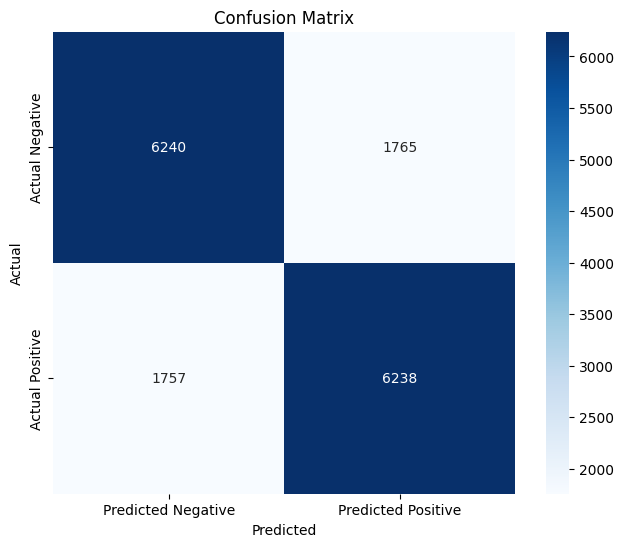

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_df['target'], predictions)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

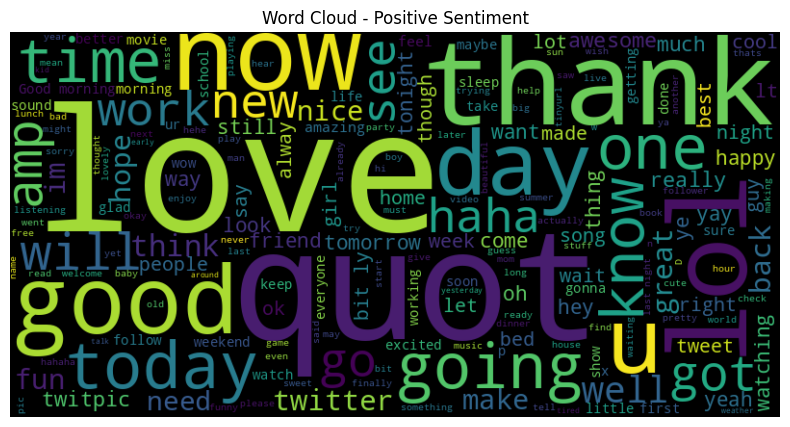

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_tweets = df[df['target'] == 'positive']
positive_text = ' '.join(positive_tweets['text'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()
